In [117]:
import pandas as pd
import seaborn as sns
import numpy as np


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [45]:
df = pd.read_csv('data/drug_consumption_clean.csv', index_col=0)
df.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Semer,VSA,User
0,35-44,female,Prof_cert,UK,White_Asian,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,0,0,0,0,0,0,0,0,0
1,25-34,male,PhD,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,1,0,0,0,0,0,0,0,0,1
2,35-44,male,Prof_cert,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,0,0,0,0,0,0
3,18-24,female,Masters,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,0,0,0,0,0,0,0,0,0
4,35-44,female,PhD,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,0,0,0,0,0,0,0,0,0,0


In [46]:
# removing columns for individual drugs
drug_columns = ['Amphet', 'Amyl', 'Benzos', 'Coke', 'Crack', 'Ecstasy', 'Heroin',
       'Ketamine', 'Legalh', 'LSD', 'Meth', 'Shrooms', 'Semer', 'VSA']
df = df.drop(drug_columns, axis = 1)
df.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,User
0,35-44,female,Prof_cert,UK,White_Asian,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0
1,25-34,male,PhD,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1
2,35-44,male,Prof_cert,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0
3,18-24,female,Masters,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0
4,35-44,female,PhD,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0


In [47]:
df.head()
df.corr()


,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,User
0,35-44,female,Prof_cert,UK,White_Asian,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0
1,25-34,male,PhD,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1
2,35-44,male,Prof_cert,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0
3,18-24,female,Masters,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0
4,35-44,female,PhD,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0


,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,User
Nscore,1.000000,-0.431535,0.007530,-0.217776,-0.392354,0.173384,0.078152,0.170631
Escore,-0.431535,1.000000,0.244784,0.158082,0.307570,0.113695,0.208322,-0.051876
Oscore,0.007530,0.244784,1.000000,0.036846,-0.058607,0.275363,0.419486,0.297526
Ascore,-0.217776,0.158082,0.036846,1.000000,0.245438,-0.229945,-0.208319,-0.175912
Cscore,-0.392354,0.307570,-0.058607,0.245438,1.000000,-0.336175,-0.230334,-0.269953
Impulsive,0.173384,0.113695,0.275363,-0.229945,-0.336175,1.000000,0.622500,0.293221
SS,0.078152,0.208322,0.419486,-0.208319,-0.230334,0.622500,1.000000,0.388803
User,0.170631,-0.051876,0.297526,-0.175912,-0.269953,0.293221,0.388803,1.000000


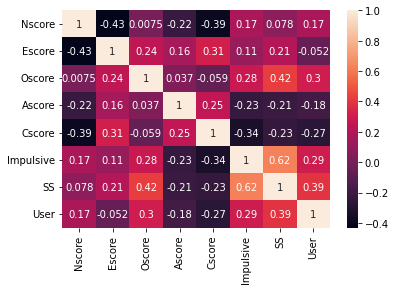

In [48]:
sns.heatmap(df.corr(), annot=True);

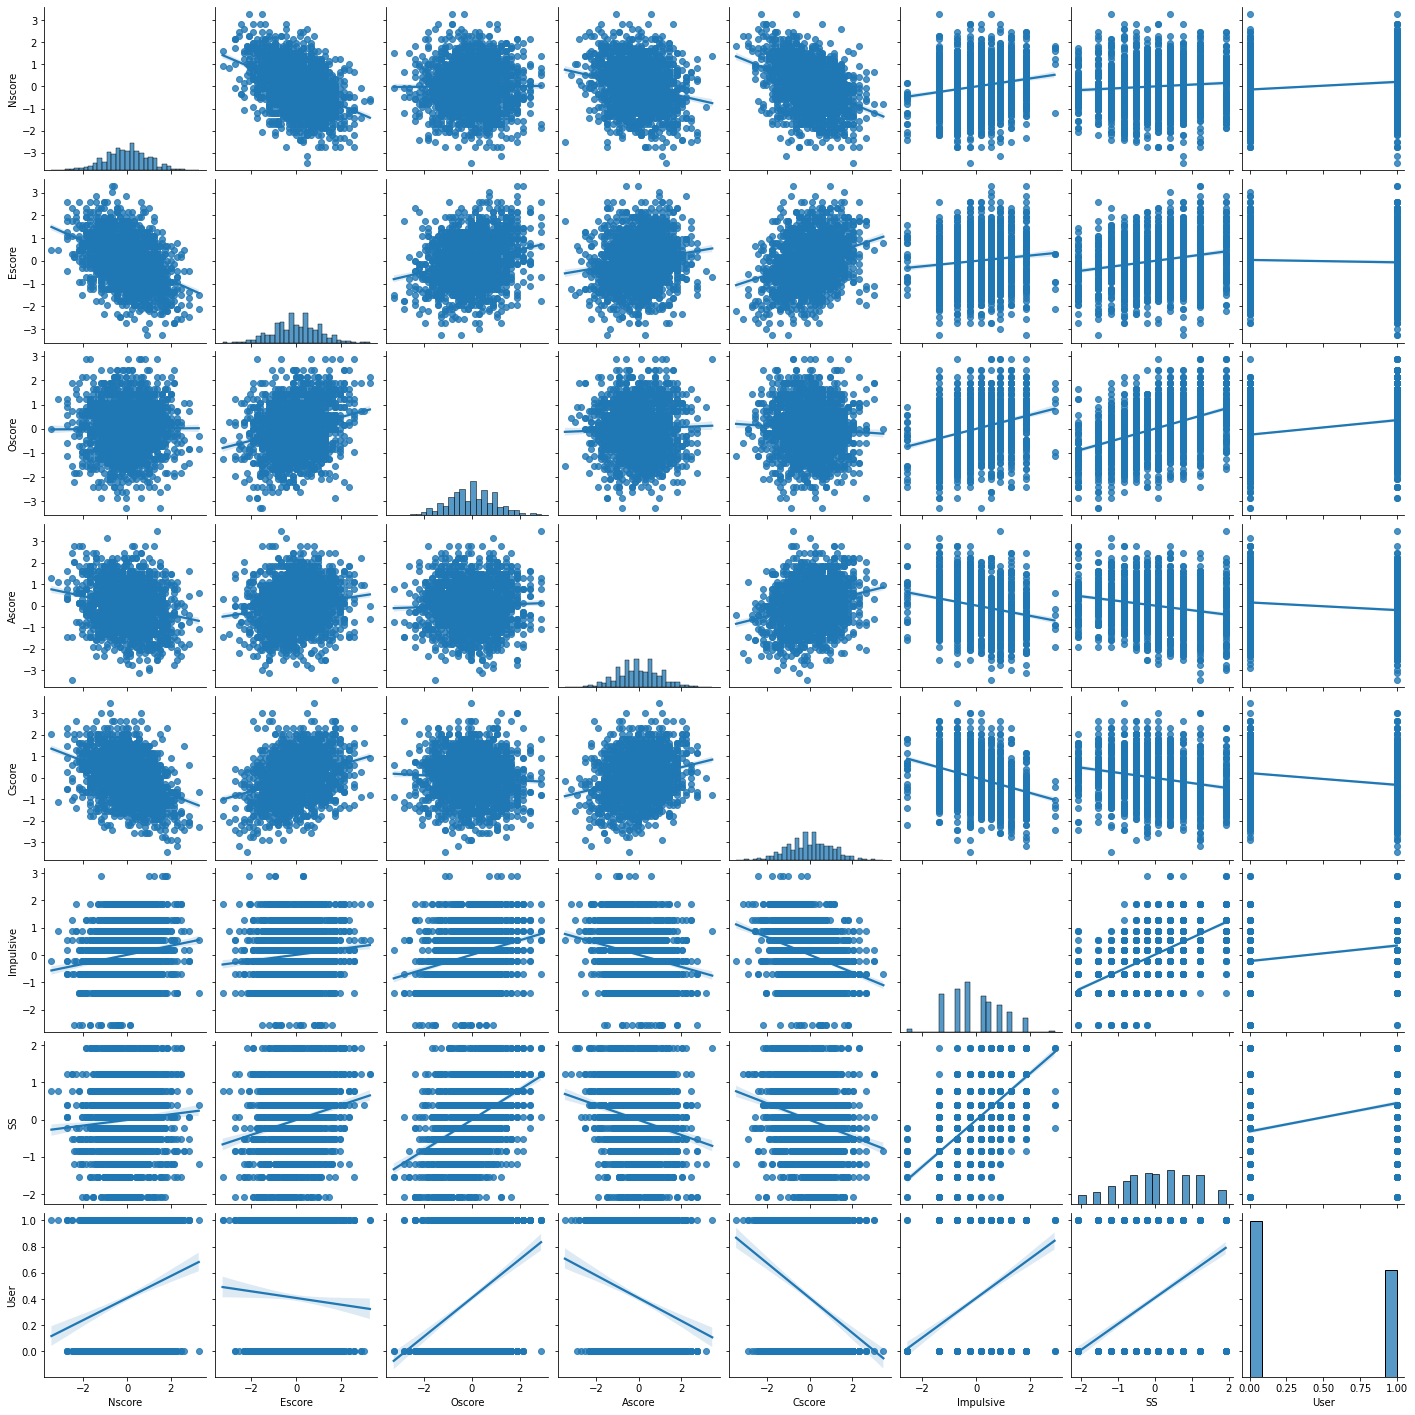

In [49]:
sns.pairplot(df, kind='reg')

In [50]:
# Define non-categorical variables
non_cat_vars = ['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']

# Define categorical variables
cat_vars = [col for col in df.columns.to_list() if col not in non_cat_vars]

# Cast variable type for categorical variables
for feat in cat_vars:
    df[feat] = df[feat].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1877 entries, 0 to 1884
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Age        1877 non-null   category
 1   Gender     1877 non-null   category
 2   Education  1877 non-null   category
 3   Country    1877 non-null   category
 4   Ethnicity  1877 non-null   category
 5   Nscore     1877 non-null   float64 
 6   Escore     1877 non-null   float64 
 7   Oscore     1877 non-null   float64 
 8   Ascore     1877 non-null   float64 
 9   Cscore     1877 non-null   float64 
 10  Impulsive  1877 non-null   float64 
 11  SS         1877 non-null   float64 
 12  User       1877 non-null   category
dtypes: category(6), float64(7)
memory usage: 194.4 KB


In [51]:
# replacing categorical features with dummy columns
for i in df.columns:
    if i != 'User':
        if df[i].dtype == 'category':
            df = pd.get_dummies(df, columns=[i], prefix=i, prefix_sep="_", drop_first=True)


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1877 entries, 0 to 1884
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Nscore                          1877 non-null   float64 
 1   Escore                          1877 non-null   float64 
 2   Oscore                          1877 non-null   float64 
 3   Ascore                          1877 non-null   float64 
 4   Cscore                          1877 non-null   float64 
 5   Impulsive                       1877 non-null   float64 
 6   SS                              1877 non-null   float64 
 7   User                            1877 non-null   category
 8   Age_25-34                       1877 non-null   uint8   
 9   Age_35-44                       1877 non-null   uint8   
 10  Age_45-54                       1877 non-null   uint8   
 11  Age_55-64                       1877 non-null   uint8   
 12  Age_65+             

In [53]:
# Starting applying the ML models
from sklearn.model_selection import train_test_split

RSEED = 42
y=df['User']
X=df.drop('User', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=RSEED)


In [54]:
X_train.shape, X_test.shape

((1407, 33), (470, 33))

In [63]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1407 entries, 280 to 1146
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Nscore                          1407 non-null   float64
 1   Escore                          1407 non-null   float64
 2   Oscore                          1407 non-null   float64
 3   Ascore                          1407 non-null   float64
 4   Cscore                          1407 non-null   float64
 5   Impulsive                       1407 non-null   float64
 6   SS                              1407 non-null   float64
 7   Age_25-34                       1407 non-null   uint8  
 8   Age_35-44                       1407 non-null   uint8  
 9   Age_45-54                       1407 non-null   uint8  
 10  Age_55-64                       1407 non-null   uint8  
 11  Age_65+                         1407 non-null   uint8  
 12  Gender_male                     

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, CategoricalNB, ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt




In [56]:
lr_model = LogisticRegression(random_state=RSEED)
nb_gaus_model = GaussianNB()
nb_catg_model = CategoricalNB() #failed! does not accept negative values
nb_comp_model = ComplementNB()  #failed! does not accept negative values
knn_model = KNeighborsClassifier()
svm_model = LinearSVC(max_iter=2000, random_state=RSEED)
svc_model = SVC(random_state=RSEED)
dt_model = DecisionTreeClassifier(random_state=RSEED)
et_model = ExtraTreeClassifier(random_state=RSEED)
rf_model = RandomForestClassifier(random_state=RSEED)
ada_model = AdaBoostClassifier(random_state=RSEED)
xgb_model = XGBClassifier()  #failed!



In [57]:
from warnings import simplefilter
# ignore all future and user warnings
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=UserWarning)


LogisticRegression(random_state=42)

[[237  42]
 [ 57 134]]
Accuracy = 0.79
Recall = 0.7
Precision = 0.76
f1_score = 0.73
f_beta = 0.71


GaussianNB()

[[262  17]
 [128  63]]
Accuracy = 0.69
Recall = 0.33
Precision = 0.79
f1_score = 0.46
f_beta = 0.37


KNeighborsClassifier()

[[230  49]
 [ 61 130]]
Accuracy = 0.77
Recall = 0.68
Precision = 0.73
f1_score = 0.7
f_beta = 0.69


LinearSVC(max_iter=2000, random_state=42)

[[238  41]
 [ 55 136]]
Accuracy = 0.8
Recall = 0.71
Precision = 0.77
f1_score = 0.74
f_beta = 0.72


SVC(random_state=42)

[[227  52]
 [ 52 139]]
Accuracy = 0.78
Recall = 0.73
Precision = 0.73
f1_score = 0.73
f_beta = 0.73


DecisionTreeClassifier(random_state=42)

[[222  57]
 [ 73 118]]
Accuracy = 0.72
Recall = 0.62
Precision = 0.67
f1_score = 0.64
f_beta = 0.63


ExtraTreeClassifier(random_state=42)

[[215  64]
 [ 72 119]]
Accuracy = 0.71
Recall = 0.62
Precision = 0.65
f1_score = 0.64
f_beta = 0.63


RandomForestClassifier(random_state=42)

[[232  47]
 [ 52 139]]
Accuracy = 0.79
Recall = 0.73
Precision = 0.75
f1_score = 0.74
f_beta = 0.73


AdaBoostClassifier(random_state=42)

[[235  44]
 [ 56 135]]
Accuracy = 0.79
Recall = 0.71
Precision = 0.75
f1_score = 0.73
f_beta = 0.72
 LogisticRegression 
 {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


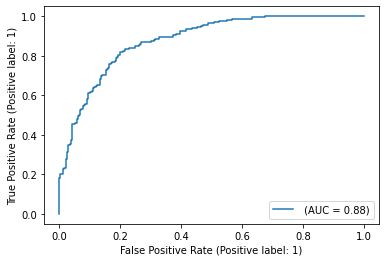

 GaussianNB 
 {'priors': None, 'var_smoothing': 1e-09}


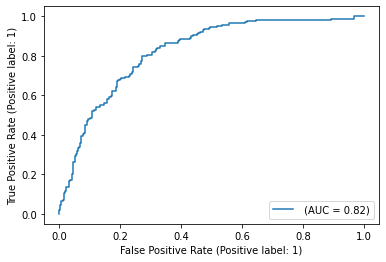

 KNeighborsClassifier 
 {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


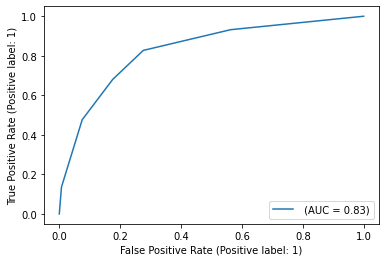

 LinearSVC 
 {'C': 1.0, 'class_weight': None, 'dual': True, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 2000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': 42, 'tol': 0.0001, 'verbose': 0}


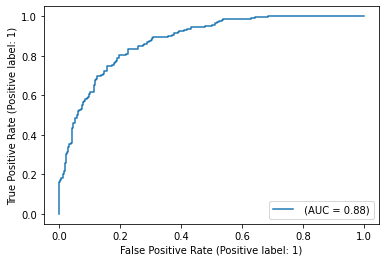

 SVC 
 {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}


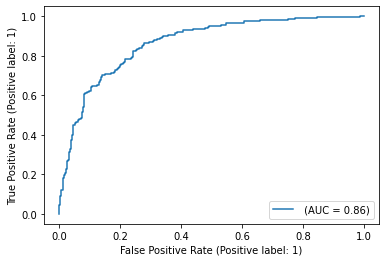

 DecisionTreeClassifier 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


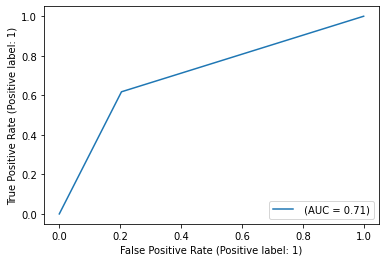

 ExtraTreeClassifier 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'random'}


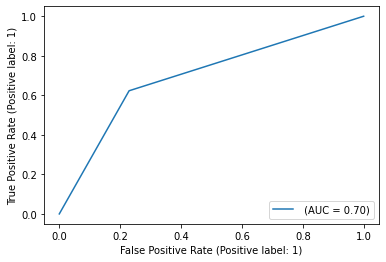

 RandomForestClassifier 
 {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


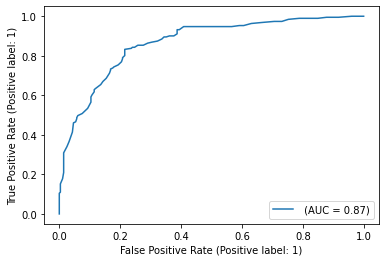

 AdaBoostClassifier 
 {'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 1.0, 'n_estimators': 50, 'random_state': 42}


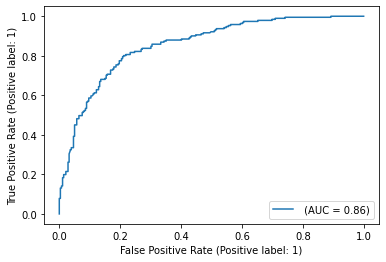

LogisticRegression F_beta Score: 0.713
GaussianNB F_beta Score: 0.373
KNeighborsClassifier F_beta Score: 0.689
LinearSVC F_beta Score: 0.723
SVC F_beta Score: 0.728
DecisionTreeClassifier F_beta Score: 0.628
ExtraTreeClassifier F_beta Score: 0.628
RandomForestClassifier F_beta Score: 0.732
AdaBoostClassifier F_beta Score: 0.716


In [86]:
beta = 2
models = [  lr_model, nb_gaus_model, knn_model, svm_model, 
            svc_model, dt_model, et_model, rf_model, ada_model]

model_names = []
f_beta_results = []
f_beta_train_results = []
for model in models:
    print("="*50)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test,y_pred)
    Recall = recall_score(y_test,y_pred)
    Precision = precision_score(y_test,y_pred)
    Accuracy = accuracy_score(y_test, y_pred)
    F_score = f1_score(y_test,y_pred)
    F_beta = fbeta_score(y_test, y_pred, beta = beta)
    f_beta_results.append(F_beta)
    y_pred_train = model.predict(X_train)
    F_beta_train = fbeta_score(y_train, y_pred_train, beta = beta)
    f_beta_train_results.append(F_beta_train)
    model_names.append(model.__class__.__name__)
    print(cm)
    #print(classification_report(y_test,y_pred))
    print(f"Accuracy = {round(Accuracy,2)}")
    print(f"Recall = {round(Recall,2)}")
    print(f"Precision = {round(Precision,2)}")
    print(f"f1_score = {round(F_score,2)}")
    print(f"f_beta = {round(F_beta,2)}")

for model in models:
    print("="*50, "\n", model.__class__.__name__, "\n", model.get_params())
    y_pred = model.predict(X_test)
    roc = plot_roc_curve(model, X_test, y_test, name = "")
    plt.show()

# for model, f_beta, f_beta_train in zip(model_names, f_beta_results, f_beta_train_results):
#     print(model, "F_beta Score: {:.3f}".format(f_beta)), "F_beta_train Score: {:.3f}".format(f_beta_train))

for model, f_beta in zip(model_names, f_beta_results):
    print(model, "F_beta Score: {:.3f}".format(f_beta))


# F_beta values
### Log Reg : 0.71
### GaussianNB : 0.37
### KNeighborsClassifier : 0.69
### LinearSVC : 0.72
### SVC : 0.73
### DecisionTree : 0.63
### ExtraTree : 0.63
### RandomForest : 0.73
### Adaboost : 0.72

Naive Bayes assumes that predictors are conditionally independent => this might not be the case here (SS and Impulsive for example). Could this explain the bad results from NB?

# Create a scorer

In [122]:
from sklearn.metrics import make_scorer

def min_cost_scorer(y_test, y_pred, test_cost = 100, training_cost = 10000, prob_clean = 0.5, user_cost = 50000):
    # get confusion matrix from y_test and y_predict
    cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

    # cost of students taking the test
    test_costs = test_cost * sum(sum(cm))
    # cost of a student falsely identified to not consume drugs
    FN_cost = user_cost * cm[1][0]
    # cost of a student having training due to falsely being identified as a drug user
    FP_cost = training_cost * cm[0][1]
    # cost of a student having training due to correctly being identified as a potential drug user considering 
    # that the training is prob_clean % effective
    TP_cost = training_cost * cm[1][1] + user_cost * cm[1][1] * (1 - prob_clean)

    return test_costs + FN_cost + FP_cost + TP_cost


cost_scorer = make_scorer(min_cost_scorer, greater_is_better=False)

# Randomized Search CV for better Hyperparameters

In [123]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import fbeta_score, make_scorer

ftwo_scorer = make_scorer(fbeta_score, beta=2)

param_grid = { 
    'n_estimators': range(100,500,10),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : range(3, 17, 2),
    'criterion' :['gini', 'entropy']
}

rf_model = RandomForestClassifier(random_state=RSEED)
randCV_rfc = RandomizedSearchCV(estimator = rf_model, param_distributions = param_grid, n_iter = 60, scoring= cost_scorer, refit=True, verbose = 1)
randCV_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42), n_iter=60,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(3, 17, 2),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': range(100, 500, 10)},
                   scoring=make_scorer(min_cost_scorer, greater_is_better=False),
                   verbose=1)

In [132]:
print(randCV_rfc.best_params_)
print(randCV_rfc.best_score_)

y_pred = randCV_rfc.predict(X_test)

print("Optimized costs: {:,}".format( min_cost_scorer(y_test,y_pred)))

cm = confusion_matrix(y_test,y_pred)

y_pred_all = np.ones(len(y_test))
y_pred_zero = np.zeros(len(y_test))

cost_all_user = min_cost_scorer(y_test, y_pred_all)

cost_no_user =  min_cost_scorer(y_test, y_pred_zero, test_cost= 0)

print("Costs of predicting all to be a user: {:,}".format(cost_all_user))
print("Costs of not implementing the detection system: {:,}".format(cost_no_user))



{'n_estimators': 230, 'max_features': 'auto', 'max_depth': 7, 'criterion': 'entropy'}
-4791140.0
Optimized costs: 8,032,000.0
Costs of predicting all to be a user: 9,522,000.0
Costs of not implementing the detection system: 9,550,000.0


# Grid-parameter search for RandomForestClassifier 

In [59]:
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,20],
    'criterion' :['gini', 'entropy']
}
rf_model = RandomForestClassifier(random_state=RSEED)
CV_rfc = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv= 5, scoring=ftwo_scorer, verbose = 1)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_
CV_rfc.best_score_


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]},
             scoring=make_scorer(fbeta_score, beta=2))

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

0.7367480058873557

# Best score for RandomForest is 0.74 
<br>
Best parameters for this score are : {'criterion': 'gini','max_depth': 8,'max_features': 'auto','n_estimators': 500}

# Grid-parameter search for SVCClassifier 

In [101]:
param_grid = [{"kernel": ["rbf", "linear"], "gamma": [1e-2, 1e-3, 1e-4], "C": [1, 10, 100]},
              {'C': [1.0], 'break_ties': [False], 'cache_size': [200], 'class_weight': [None], 'coef0': [0.0], 'decision_function_shape': ['ovr'], 'degree': [3], 'gamma':[ 'scale'], 'kernel':[ 'rbf'], 'max_iter':[ -1], 'probability':[ False], 'random_state':[ 42], 'shrinking':[ True], 'tol':[ 0.001], 'verbose':[ False]}]
#param_grid = {'C': [1.0], 'break_ties': [False], 'cache_size': [200], 'class_weight': [None], 'coef0': [0.0], 'decision_function_shape': ['ovr'], 'degree': [3], 'gamma':[ 'scale'], 'kernel':[ 'rbf'], 'max_iter':[ -1], 'probability':[ False], 'random_state':[ 42], 'shrinking':[ True], 'tol':[ 0.001], 'verbose':[ False]}
CV_svc = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv= 5, scoring=ftwo_scorer, verbose = 1)
CV_svc.fit(X_train, y_train)
CV_svc.best_params_

CV_svc.scorer_ , CV_svc.best_score_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1.0], 'break_ties': [False], 'cache_size': [200],
                         'class_weight': [None], 'coef0': [0.0],
                         'decision_function_shape': ['ovr'], 'degree': [3],
                         'gamma': ['scale'], 'kernel': ['rbf'],
                         'max_iter': [-1], 'probability': [False],
                         'random_state': [42], 'shrinking': [True],
                         'tol': [0.001], 'verbose': [False]},
             scoring=make_scorer(fbeta_score, beta=2), verbose=1)

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

(make_scorer(fbeta_score, beta=2), 0.7473665741191619)

In [94]:
svc_best = SVC(**CV_svc.best_params_)
svc_best.fit(X_train,y_train)

y_pred_svc = svc_best.predict(X_test)

recall_score(y_test, y_pred_svc)
precision_score(y_test, y_pred_svc)
fbeta_score(y_test, y_pred_svc, beta = 2)
confusion_matrix(y_test, y_pred_svc)

SVC(C=100, gamma=0.001)

0.7172774869109948

0.681592039800995

0.7098445595854923

array([[215,  64],
       [ 54, 137]])

In [102]:
params = {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}
svc_basic = SVC(**params)
svc_basic.fit(X_train,y_train)

y_pred_svc_basic = svc_basic.predict(X_test)

recall_score(y_test, y_pred_svc_basic)
precision_score(y_test, y_pred_svc_basic)
fbeta_score(y_test, y_pred_svc_basic, beta = 2)
confusion_matrix(y_test, y_pred_svc_basic)

SVC(random_state=42)

0.7277486910994765

0.7277486910994765

0.7277486910994765

array([[227,  52],
       [ 52, 139]])

<AxesSubplot:xlabel='User', ylabel='count'>

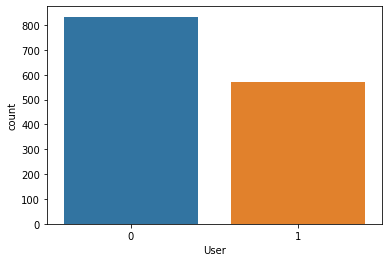

In [97]:
sns.countplot(y_train)

<AxesSubplot:xlabel='User', ylabel='count'>

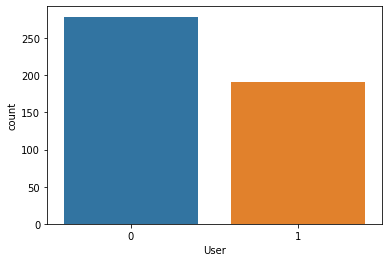

In [98]:
sns.countplot(y_test)

<AxesSubplot:ylabel='count'>

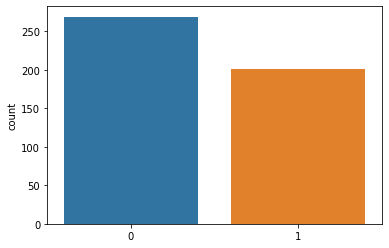

In [99]:
sns.countplot(y_pred_svc)

<AxesSubplot:ylabel='count'>

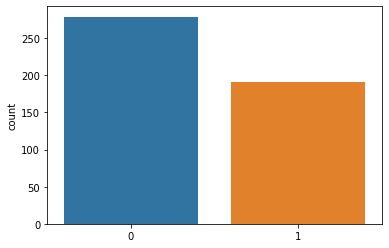

In [96]:
sns.countplot(y_pred_svc_basic)

# Best score for SVC is 0.76 
<br>
## Best parameters are {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

TODO:
- optimize hyperparameters further
- ensemble models
